# Load Preprocessed Data

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('../prepo/cleaned-data-kelas.csv', index_col=0)
df.head()

,NIM,Nama,Judul,Abstrak,Kelas,judul_tokens,abstrak_tokens
0,40411100468,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,RPL,rancang implementasi sistem database distribus...,sistem informasi akademik siakad sistem inform...
1,40411100476,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,RPL,aplikasi kontrol monitoring jaring komputer ba...,jalan koneksi jaring komputer lancar ganggu ha...
2,70411100070,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Komputasi,sistem dukung putus optimasi jadwal matakuliah...,jadwal kuliah guru kompleks masalah variabel t...
3,80411100115,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Komputasi,sistem augmented reality animasi benda gerak f...,iring kembang teknologi dunia muncul teknologi...
4,70411100007,Adi Chandra Laksono,gerak pekerja pada game real time strategy men...,gerak pekerja ada pada game yang memiliki genr...,RPL,gerak kerja game real time strategy finite sta...,gerak kerja game milik genre rts real time str...


# Split Data

In [6]:
from sklearn.model_selection import train_test_split

X = df['abstrak_tokens']
y = df['Kelas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Extraction: TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape

(554, 4881)

In [8]:
terms = vectorizer.get_feature_names()

sums = X_train_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

        term       rank
4077  sistem  23.040459
701    citra  21.107039
854     data  20.648087
2709  metode  20.359528
1550   hasil  19.415775
...      ...        ...
3608   ratus   0.050905
690    china   0.050905
2578    mbps   0.045443
1647    idle   0.045443
3544     qos   0.045443

[4881 rows x 2 columns]


c:\Users\Irham Hamed Ayani\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



# Oversampling: SMOTE

In [9]:
y_train.value_counts()

Komputasi    301
RPL          178
NLP           75
Name: Kelas, dtype: int64

In [10]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_tfidf, y_train)

y_train_resampled.value_counts()

Komputasi    301
RPL          301
NLP          301
Name: Kelas, dtype: int64

# Training Model

## GridSearchCV

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'criterion':['gini','entropy', 'log_loss'],'max_depth':[10, 20, 30, None]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='roc_auc_ovr', cv=10, verbose=3)

# fitting the model for grid search
grid.fit(X_train_resampled, y_train_resampled)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .....criterion=gini, max_depth=10;, score=0.753 total time=   0.0s
[CV 2/10] END .....criterion=gini, max_depth=10;, score=0.847 total time=   0.0s
[CV 3/10] END .....criterion=gini, max_depth=10;, score=0.798 total time=   0.0s
[CV 4/10] END .....criterion=gini, max_depth=10;, score=0.779 total time=   0.0s
[CV 5/10] END .....criterion=gini, max_depth=10;, score=0.846 total time=   0.0s
[CV 6/10] END .....criterion=gini, max_depth=10;, score=0.843 total time=   0.0s
[CV 7/10] END .....criterion=gini, max_depth=10;, score=0.926 total time=   0.0s
[CV 8/10] END .....criterion=gini, max_depth=10;, score=0.896 total time=   0.0s
[CV 9/10] END .....criterion=gini, max_depth=10;, score=0.856 total time=   0.0s
[CV 10/10] END ....criterion=gini, max_depth=10;, score=0.904 total time=   0.0s
[CV 1/10] END .....criterion=gini, max_depth=20;, score=0.752 total time=   0.0s
[CV 2/10] END .....criterion=gini, max_depth=2

c:\Users\Irham Hamed Ayani\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Irham Hamed Ayani\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Irham Hamed Ayani\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\Irham Hamed Ayani\AppData\Local\Programs\Python\Python38\

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, None]},
             scoring='roc_auc_ovr', verbose=3)

In [12]:
# Tabel hasil GridSearchCV
results_df = pd.DataFrame(grid.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.089265,0.014045,0.004390,0.001431,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.752659,0.847312,0.797999,0.778519,0.845926,0.842963,0.925926,0.896481,0.856296,0.904259,0.844834,0.052919,2
1,0.115014,0.009775,0.004056,0.000662,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.752250,0.785544,0.729615,0.791667,0.857500,0.833333,0.916667,0.875000,0.866667,0.891667,0.829991,0.059176,3
2,0.107124,0.007669,0.004252,0.000843,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.760313,0.785814,0.744148,0.775000,0.800000,0.833333,0.891667,0.858333,0.858333,0.883333,0.819028,0.050164,5
3,0.105756,0.006055,0.003863,0.000450,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.735763,0.777077,0.769102,0.808333,0.841667,0.825000,0.891667,0.866667,0.866667,0.891667,0.827361,0.051230,4
4,0.127448,0.005044,0.004206,0.000838,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.758623,0.748865,0.870487,0.812407,0.821667,0.867222,0.937037,0.822222,0.879815,0.938241,0.845659,0.061923,1
5,0.152633,0.005514,0.004010,0.000627,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.727879,0.718741,0.843246,0.775000,0.741667,0.825000,0.891667,0.816667,0.841667,0.875000,0.805653,0.058352,8
6,0.148724,0.003955,0.003616,0.000497,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.735988,0.702344,0.818516,0.808333,0.775000,0.816667,0.891667,0.800000,0.875000,0.916667,0.814018,0.063736,6
7,0.162283,0.013991,0.004101,0.000697,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.728104,0.735632,0.802029,0.766667,0.766667,0.841667,0.875000,0.800000,0.875000,0.891667,0.808243,0.056787,7
8,0.004117,0.000697,0.000000,0.000000,log_loss,10,"{'criterion': 'log_loss', 'max_depth': 10}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.003837,0.000766,0.000000,0.000000,log_loss,20,"{'criterion': 'log_loss', 'max_depth': 20}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [13]:
# Peringkat Score Parameter hasil GridSearchCV
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("criterion")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
criterion,,,,
entropy_10,"{'criterion': 'entropy', 'max_depth': 10}",1,0.845659,0.061923
gini_10,"{'criterion': 'gini', 'max_depth': 10}",2,0.844834,0.052919
gini_20,"{'criterion': 'gini', 'max_depth': 20}",3,0.829991,0.059176
gini_None,"{'criterion': 'gini', 'max_depth': None}",4,0.827361,0.051230
gini_30,"{'criterion': 'gini', 'max_depth': 30}",5,0.819028,0.050164
entropy_30,"{'criterion': 'entropy', 'max_depth': 30}",6,0.814018,0.063736
entropy_None,"{'criterion': 'entropy', 'max_depth': None}",7,0.808243,0.056787
entropy_20,"{'criterion': 'entropy', 'max_depth': 20}",8,0.805653,0.058352
log_loss_10,"{'criterion': 'log_loss', 'max_depth': 10}",9,NaN,NaN


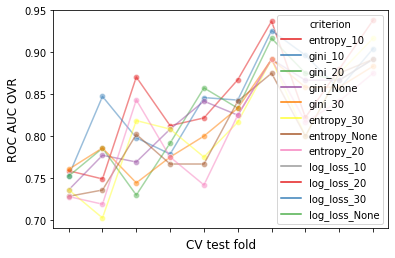

Correlation of models:
 criterion      entropy_10   gini_10   gini_20  gini_None   gini_30  \
criterion                                                            
entropy_10       1.000000  0.636308  0.630143   0.752843  0.698821   
gini_10          0.636308  1.000000  0.886479   0.879563  0.900359   
gini_20          0.630143  0.886479  1.000000   0.958859  0.951361   
gini_None        0.752843  0.879563  0.958859   1.000000  0.927605   
gini_30          0.698821  0.900359  0.951361   0.927605  1.000000   
entropy_30       0.960415  0.575359  0.646882   0.780486  0.721603   
entropy_None     0.945467  0.694063  0.703809   0.805320  0.814265   
entropy_20       0.950337  0.621681  0.554981   0.694636  0.684547   
log_loss_10           NaN       NaN       NaN        NaN       NaN   
log_loss_20           NaN       NaN       NaN        NaN       NaN   
log_loss_30           NaN       NaN       NaN        NaN       NaN   
log_loss_None         NaN       NaN       NaN        NaN       NaN

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose(),
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("ROC AUC OVR", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

In [29]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)
model = clf.fit(X_train_resampled,y_train_resampled)

[Text(0.5881622516556292, 0.9545454545454546, 'X[107] <= 0.0\ngini = 0.667\nsamples = 903\nvalue = [301, 301, 301]'),
 Text(0.4457781456953642, 0.8636363636363636, 'X[3409] <= 0.0\ngini = 0.606\nsamples = 499\nvalue = [144, 93, 262]'),
 Text(0.3650662251655629, 0.7727272727272727, 'X[390] <= 0.003\ngini = 0.569\nsamples = 463\nvalue = [142, 59, 262]'),
 Text(0.2433774834437086, 0.6818181818181818, 'X[2709] <= 0.011\ngini = 0.612\nsamples = 299\nvalue = [132, 43, 124]'),
 Text(0.15562913907284767, 0.5909090909090909, 'X[126] <= 0.018\ngini = 0.537\nsamples = 118\nvalue = [24, 20, 74]'),
 Text(0.12582781456953643, 0.5, 'X[167] <= 0.024\ngini = 0.438\nsamples = 101\nvalue = [16, 12, 73]'),
 Text(0.11258278145695365, 0.4090909090909091, 'X[1882] <= 0.025\ngini = 0.389\nsamples = 96\nvalue = [16, 7, 73]'),
 Text(0.09933774834437085, 0.3181818181818182, 'X[2827] <= 0.0\ngini = 0.348\nsamples = 92\nvalue = [12, 7, 73]'),
 Text(0.052980132450331126, 0.22727272727272727, 'X[3874] <= 0.029\ngini

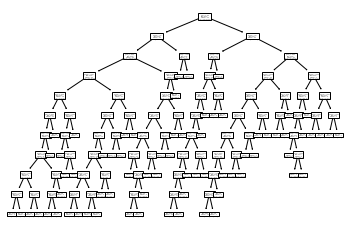

In [30]:
from sklearn import tree

tree.plot_tree(model) 

In [31]:
print('Decision Tree depth : ',model.get_depth())
print('Decision Tree n leaves : ',model.get_n_leaves())

Decision Tree depth :  10
Decision Tree n leaves :  70


# Evaluation

In [32]:
predictions = model.predict(X_test_tfidf)

In [33]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[81 10 22]
 [25 15  9]
 [21  4 51]]


c:\Users\Irham Hamed Ayani\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


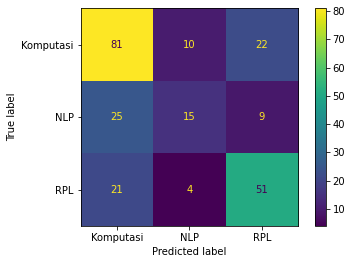

In [35]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test_tfidf, y_test) 
plt.show()

In [36]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

   Komputasi       0.64      0.72      0.67       113
         NLP       0.52      0.31      0.38        49
         RPL       0.62      0.67      0.65        76

    accuracy                           0.62       238
   macro avg       0.59      0.56      0.57       238
weighted avg       0.61      0.62      0.61       238



In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions))
print('Precision score : ', precision_score(y_test, predictions, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions, average='weighted'))

Accuracy score :  0.6176470588235294
Precision score :  0.6079159092893529
Recall score :  0.6176470588235294
F1 score :  0.605816995736951


# Export Model

In [27]:
from joblib import dump

dump(model, filename="model/dtc-model-abstrak.joblib")
dump(vectorizer, filename="model/vectorizer_model_abstrak.joblib")

['model/vectorizer_model_abstrak.joblib']

# Demo

In [28]:
title_input = input("Masukkan Abstrak Skripsi:\n")

'''
catatan input:
sisinta um adalah sistem informasi berbasis website bertujuan untuk menampilkan data yang berkaitan dengan skripsi dan tugas akhir pada jurusan teknik elektro fakultas teknik universitas negeri malang. penggunaan sistem informasi sisinta memiliki potensi jika dikembangkan dengan mengklasifikasikan judul dan abstrak berdasarkan tema penelitiannya. tujuan penelitian ini adalah untuk menerapkan dan menguji performa algoritma decision tree classifier dalam mengklasifikasi judul skripsi dan tugas akhir, berdasarkan tema penelitian dalam kbk di jurusan teknik elektro ft um. decision tree classifier adalah algoritma supervised learning non-parametrik, yang digunakan untuk klasifikasi dan regresi. decision tree memiliki hierarki, struktur pohon, yang terdiri dari root node, branches, internal nodes dan leaf nodes. dengan menggunakan metode decision tree classifier dalam implementasinya diharapkan dapat memprediksi jenis kelompok bidang keahlian yang sesuai. data yang digunakan dalam penelitian sistem klasifikasi ini didapatkan dari database sisinta te-um berupa judul, abstrak, dan kbk yang terkait dengan tema penelitian pada skripsi dan tugas akhir tersebut.
'''

hasil = clf.predict_proba(vectorizer.transform([title_input]))

print(f"Abstrak Skripsi: {title_input}")

list1 = hasil.tolist()
cls = clf.classes_
list2 = cls.tolist()

d = {"Kelompok Bidang Keahlian":list2,"Probability":list1[0]}
df_proba = pd.DataFrame(d)

print(df_proba.sort_values("Probability", ascending=False))

Masukkan Abstrak Skripsi:
sisinta um adalah sistem informasi berbasis website bertujuan untuk menampilkan data yang berkaitan dengan skripsi dan tugas akhir pada jurusan teknik elektro fakultas teknik universitas negeri malang. penggunaan sistem informasi sisinta memiliki potensi jika dikembangkan dengan mengklasifikasikan judul dan abstrak berdasarkan tema penelitiannya. tujuan penelitian ini adalah untuk menerapkan dan menguji performa algoritma decision tree classifier dalam mengklasifikasi judul skripsi dan tugas akhir, berdasarkan tema penelitian dalam kbk di jurusan teknik elektro ft um. decision tree classifier adalah algoritma supervised learning non-parametrik, yang digunakan untuk klasifikasi dan regresi. decision tree memiliki hierarki, struktur pohon, yang terdiri dari root node, branches, internal nodes dan leaf nodes. dengan menggunakan metode decision tree classifier dalam implementasinya diharapkan dapat memprediksi jenis kelompok bidang keahlian yang sesuai. data yang 